## José Eduardo Martínez Téllez

In [23]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn import tree
from sklearn.model_selection import train_test_split
import graphviz

In [24]:
data = pd.read_csv(r"df (1).csv")
data["activated_date"] = pd.to_datetime(data["activated_date"])
data["last_payment_date"] = pd.to_datetime(data["last_payment_date"])



## Question 1

First, let's take a simple look at the data to see if everything's were imported correctly.

In [25]:
data1 = data
data1.head(5)

,Unnamed: 0,cust_id,activated_date,last_payment_date,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,...,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
0,1,C10001,2019-06-10,2020-09-09,40.900749,0.818182,95.40,0.00,95.4,0.000000,...,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,2,C10002,2019-06-10,2020-04-07,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,...,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,3,C10003,2019-06-10,2020-09-17,2495.148862,1.000000,773.17,773.17,0.0,0.000000,...,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,4,C10004,2019-06-10,2020-08-24,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,...,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,0
4,5,C10005,2019-06-10,2020-10-20,817.714335,1.000000,16.00,16.00,0.0,0.000000,...,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


As we can see, we have 21 variables, most of them are numeric while only ("cust_id", "activated_Date", "last_payment_date") are objects.
For the first question, we want to focus our analysis on "Balance," and as we observed, this variable has some Null values. 
So we will see these values and check if we can replace them or drop them.

In [26]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Unnamed: 0                        8950 non-null   int64         
 1   cust_id                           8950 non-null   object        
 2   activated_date                    8937 non-null   datetime64[ns]
 3   last_payment_date                 8941 non-null   datetime64[ns]
 4   balance                           8948 non-null   float64       
 5   balance_frequency                 8950 non-null   float64       
 6   purchases                         8950 non-null   float64       
 7   oneoff_purchases                  8950 non-null   float64       
 8   installments_purchases            8950 non-null   float64       
 9   cash_advance                      8838 non-null   float64       
 10  purchases_frequency               8950 non-null 

Balance has two customers for whom we don´t have the amount, so as we cannot replace these values with the mean or something more reliable, we decided to drop the customers.

In [27]:
va_NA = data1["balance"].isnull()

print(data1[va_NA])

      Unnamed: 0 cust_id activated_date last_payment_date  balance  \
2491        2492  C12565     2019-12-27        2020-08-29      NaN   
3435        3436  C13532     2020-01-28        2020-08-14      NaN   

      balance_frequency  purchases  oneoff_purchases  installments_purchases  \
2491                1.0     291.62              0.00                  291.62   
3435                1.0    1711.11            537.42                 1173.69   

      cash_advance  ...  purchases_installments_frequency  \
2491   1461.717523  ...                          0.857143   
3435      0.000000  ...                          1.000000   

      cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
2491                0.142857                 4              7        1500.0   
3435                0.000000                 0             51        4000.0   

         payments  minimum_payments  prc_full_payment  tenure  fraud  
2491   276.342352        849.320880               0.0  

In [28]:
data1.dropna(subset = ["balance"])

,Unnamed: 0,cust_id,activated_date,last_payment_date,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,...,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
0,1,C10001,2019-06-10,2020-09-09,40.900749,0.818182,95.40,0.00,95.40,0.000000,...,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,2,C10002,2019-06-10,2020-04-07,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,...,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,3,C10003,2019-06-10,2020-09-17,2495.148862,1.000000,773.17,773.17,0.00,0.000000,...,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,4,C10004,2019-06-10,2020-08-24,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,...,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,0
4,5,C10005,2019-06-10,2020-10-20,817.714335,1.000000,16.00,16.00,0.00,0.000000,...,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,8946,C19186,2020-07-31,2020-03-11,28.493517,1.000000,291.12,0.00,291.12,0.000000,...,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0
8946,8947,C19187,2020-07-31,2020-06-09,19.183215,1.000000,300.00,0.00,300.00,0.000000,...,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6,0
8947,8948,C19188,2020-07-31,2020-03-06,23.398673,0.833333,144.40,0.00,144.40,0.000000,...,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0
8948,8949,C19189,2020-07-31,2020-07-19,13.457564,0.833333,0.00,0.00,0.00,36.558778,...,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0


Now, we are going to take a look at balance.
This variable has 8949 due to the two customers that we drop, the mean is 1564.612, but the max value is 19043.13; this implies that the balance has a skewed to the right.

In [29]:
data1["balance"].describe()

count     8948.000000
mean      1564.612804
std       2081.735635
min          0.000000
25%        128.234272
50%        873.385231
75%       2054.525476
max      19043.138560
Name: balance, dtype: float64

In [30]:
hist_1 = px.histogram(data1, x= "balance")
hist_1.show()


Looking at the histogram, I can tell that probably the balance has a Gamma o Lognormal Distribution because of the Skewness. On the other hand, this assumption with certain is wrong. I found two problems.
 First, we have some outliers which produced the Skewness; in general, we can fix this using log;
 Second, as we have tons of zeros, using the log transformation won’t be a good idea.
To solve these and understand the data, I’m going to apply log(1+x)

In [31]:
data1["balance"] = np.log(1+data1["balance"])

In [32]:
data1["balance"].describe()

count    8948.000000
mean        6.161504
std         2.013497
min         0.000000
25%         4.861627
50%         6.773521
75%         7.628287
max         9.854515
Name: balance, dtype: float64

In [33]:
hist_2 = px.histogram(data1, x= "balance")
hist_2.show()

In [34]:
data1["Month"] = data1["activated_date"].dt.month
data1["Year"] = data1["activated_date"].dt.year

In [35]:
data1[["activated_date","Month", "Year"]].head(5)

,activated_date,Month,Year
0,2019-06-10,6.0,2019.0
1,2019-06-10,6.0,2019.0
2,2019-06-10,6.0,2019.0
3,2019-06-10,6.0,2019.0
4,2019-06-10,6.0,2019.0


In [36]:
data1.groupby(["Year","Month"]).agg({"balance" : ["mean", "median"]})

balance          
                  mean    median
Year   Month                    
2019.0 1.0    7.098634  7.239770
       2.0    6.977657  7.396085
       3.0    6.608488  7.151909
       4.0    6.169629  6.543399
       5.0    6.742233  7.242522
       6.0    7.020326  7.309507
       7.0    6.865074  7.335164
       8.0    6.459545  7.212375
       9.0    6.592968  7.077995
       10.0   6.837454  7.318320
       11.0   6.358041  6.959519
       12.0   6.450052  6.959782
2020.0 1.0    6.490724  7.029520
       2.0    6.252366  6.840028
       3.0    6.013869  6.663662
       4.0    6.267067  6.849222
       5.0    5.906834  6.591174
       6.0    5.626828  6.144192
       7.0    5.274349  5.645014
       8.0    6.010353  6.492423
       9.0    6.120030  6.529199
       10.0   6.013119  6.699384
       11.0   5.848038  6.496469
       12.0   5.989344  6.538126

## Question 2


In [37]:
data2 = data
data2.loc[(data2["activated_date"].dt.year == 2020)&(data2["last_payment_date"].dt.year == 2020) ]
data2.describe(include = "all")

,Unnamed: 0,cust_id,activated_date,last_payment_date,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,...,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud,Month,Year
count,8950.000000,8950,8937,8941,8948.000000,8950.000000,8950.000000,8950.000000,8950.000000,8838.000000,...,8950.000000,8950.000000,8949.000000,8950.000000,8629.000000,8950.000000,8950.000000,8950.000000,8937.000000,8937.000000
unique,NaN,8950,300,200,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,C10049,2019-11-15 00:00:00,2020-10-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,48,62,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,2019-01-11 00:00:00,2020-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2020-12-07 00:00:00,2020-12-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4475.500000,NaN,NaN,NaN,6.161504,0.877271,1003.204834,592.437371,411.067645,978.980630,...,3.248827,14.709832,4494.449450,1733.143852,864.173246,0.153715,11.517318,0.007821,6.334900,2019.705718
std,2583.786788,NaN,NaN,NaN,2.013497,0.236904,2136.634782,1659.887917,904.338115,2099.762588,...,6.824647,24.857649,3638.815725,2895.063757,2373.455761,0.292499,1.338331,0.088096,3.582333,0.455745
min,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000,0.000000,1.000000,2019.000000
25%,2238.250000,NaN,NaN,NaN,4.861627,0.888889,39.635000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1600.000000,383.276166,169.079690,0.000000,12.000000,0.000000,3.000000,2019.000000


In [38]:
data2["activated_date"] = data2["activated_date"].dt.strftime("%Y-%m")
data2["last_payment_date"] = data2["last_payment_date"].dt.strftime("%Y-%m-%d")
data2["cust_id"] = data2["cust_id"].str.extract('(\d+)', expand=False)

data2["Cash Advance %"] = (data2["cash_advance"]/ data2["credit_limit"]).fillna(0)



In [39]:
sol_2 = data2[["cust_id", "activated_date", "last_payment_date", "cash_advance", "credit_limit", "Cash Advance %"]]

In [40]:
sol_2.head(10)

,cust_id,activated_date,last_payment_date,cash_advance,credit_limit,Cash Advance %
0,10001,2019-06,2020-09-09,0.000000,1000.0,0.000000
1,10002,2019-06,2020-04-07,6442.945483,7000.0,0.920421
2,10003,2019-06,2020-09-17,0.000000,7500.0,0.000000
3,10004,2019-06,2020-08-24,205.788017,7500.0,0.027438
4,10005,2019-06,2020-10-20,0.000000,1200.0,0.000000
5,10006,2019-06,2020-07-27,0.000000,1800.0,0.000000
6,10007,2019-06,2020-10-30,0.000000,13500.0,0.000000
7,10008,2019-06,2020-06-08,0.000000,2300.0,0.000000
8,10009,2019-06,2020-06-10,NaN,7000.0,0.000000
9,10010,2019-06,2020-06-05,0.000000,11000.0,0.000000


## Question 3

Let's get the Na from each column.

In [41]:
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,minimum_payments,cash_advance,Month,activated_date,Year,last_payment_date,balance,credit_limit,Cash Advance %,cust_id,...,purchases_frequency,oneoff_purchases_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,payments,prc_full_payment,tenure,fraud,Unnamed: 0
Total,321.000000,112.000000,13.000000,13.000000,13.000000,9.000000,2.000000,1.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,3.586592,1.251397,0.145251,0.145251,0.145251,0.100559,0.022346,0.011173,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We remove the na from the database and the columns that We don´t use.


In [42]:
data = data.dropna()
data = data.drop(['cust_id', "Unnamed: 0"], axis = "columns")

We will observe the correlation between the predictors and Fraud; we see that the variables most related to fraud are:
purchases, payments, and one-off purchases.

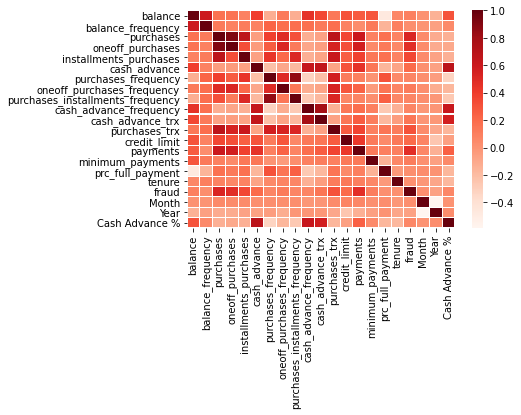

In [43]:
corr = data.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")

Let's separate the database into train and test.

In [44]:
train_data, test_data = train_test_split(data, test_size=.2,  shuffle=True )
y = 'fraud'

x = list(data.columns)
x.remove('fraud')
x.remove('last_payment_date')
x.remove('activated_date')




Given is a classification case, we will occupy the decision tree model.

In [45]:
modelo = tree.DecisionTreeClassifier()

modelo.fit(train_data[x], train_data[y].values)

DecisionTreeClassifier()

In [24]:
dot_data = tree.export_graphviz(modelo, out_file=None,
                               feature_names= x,
                               filled=True, rounded=True,
                               special_characters=True,
                               class_names = ['no fraud', 'fraud'])

In the tree, we observe that the most influential variables of the model are Purchases 

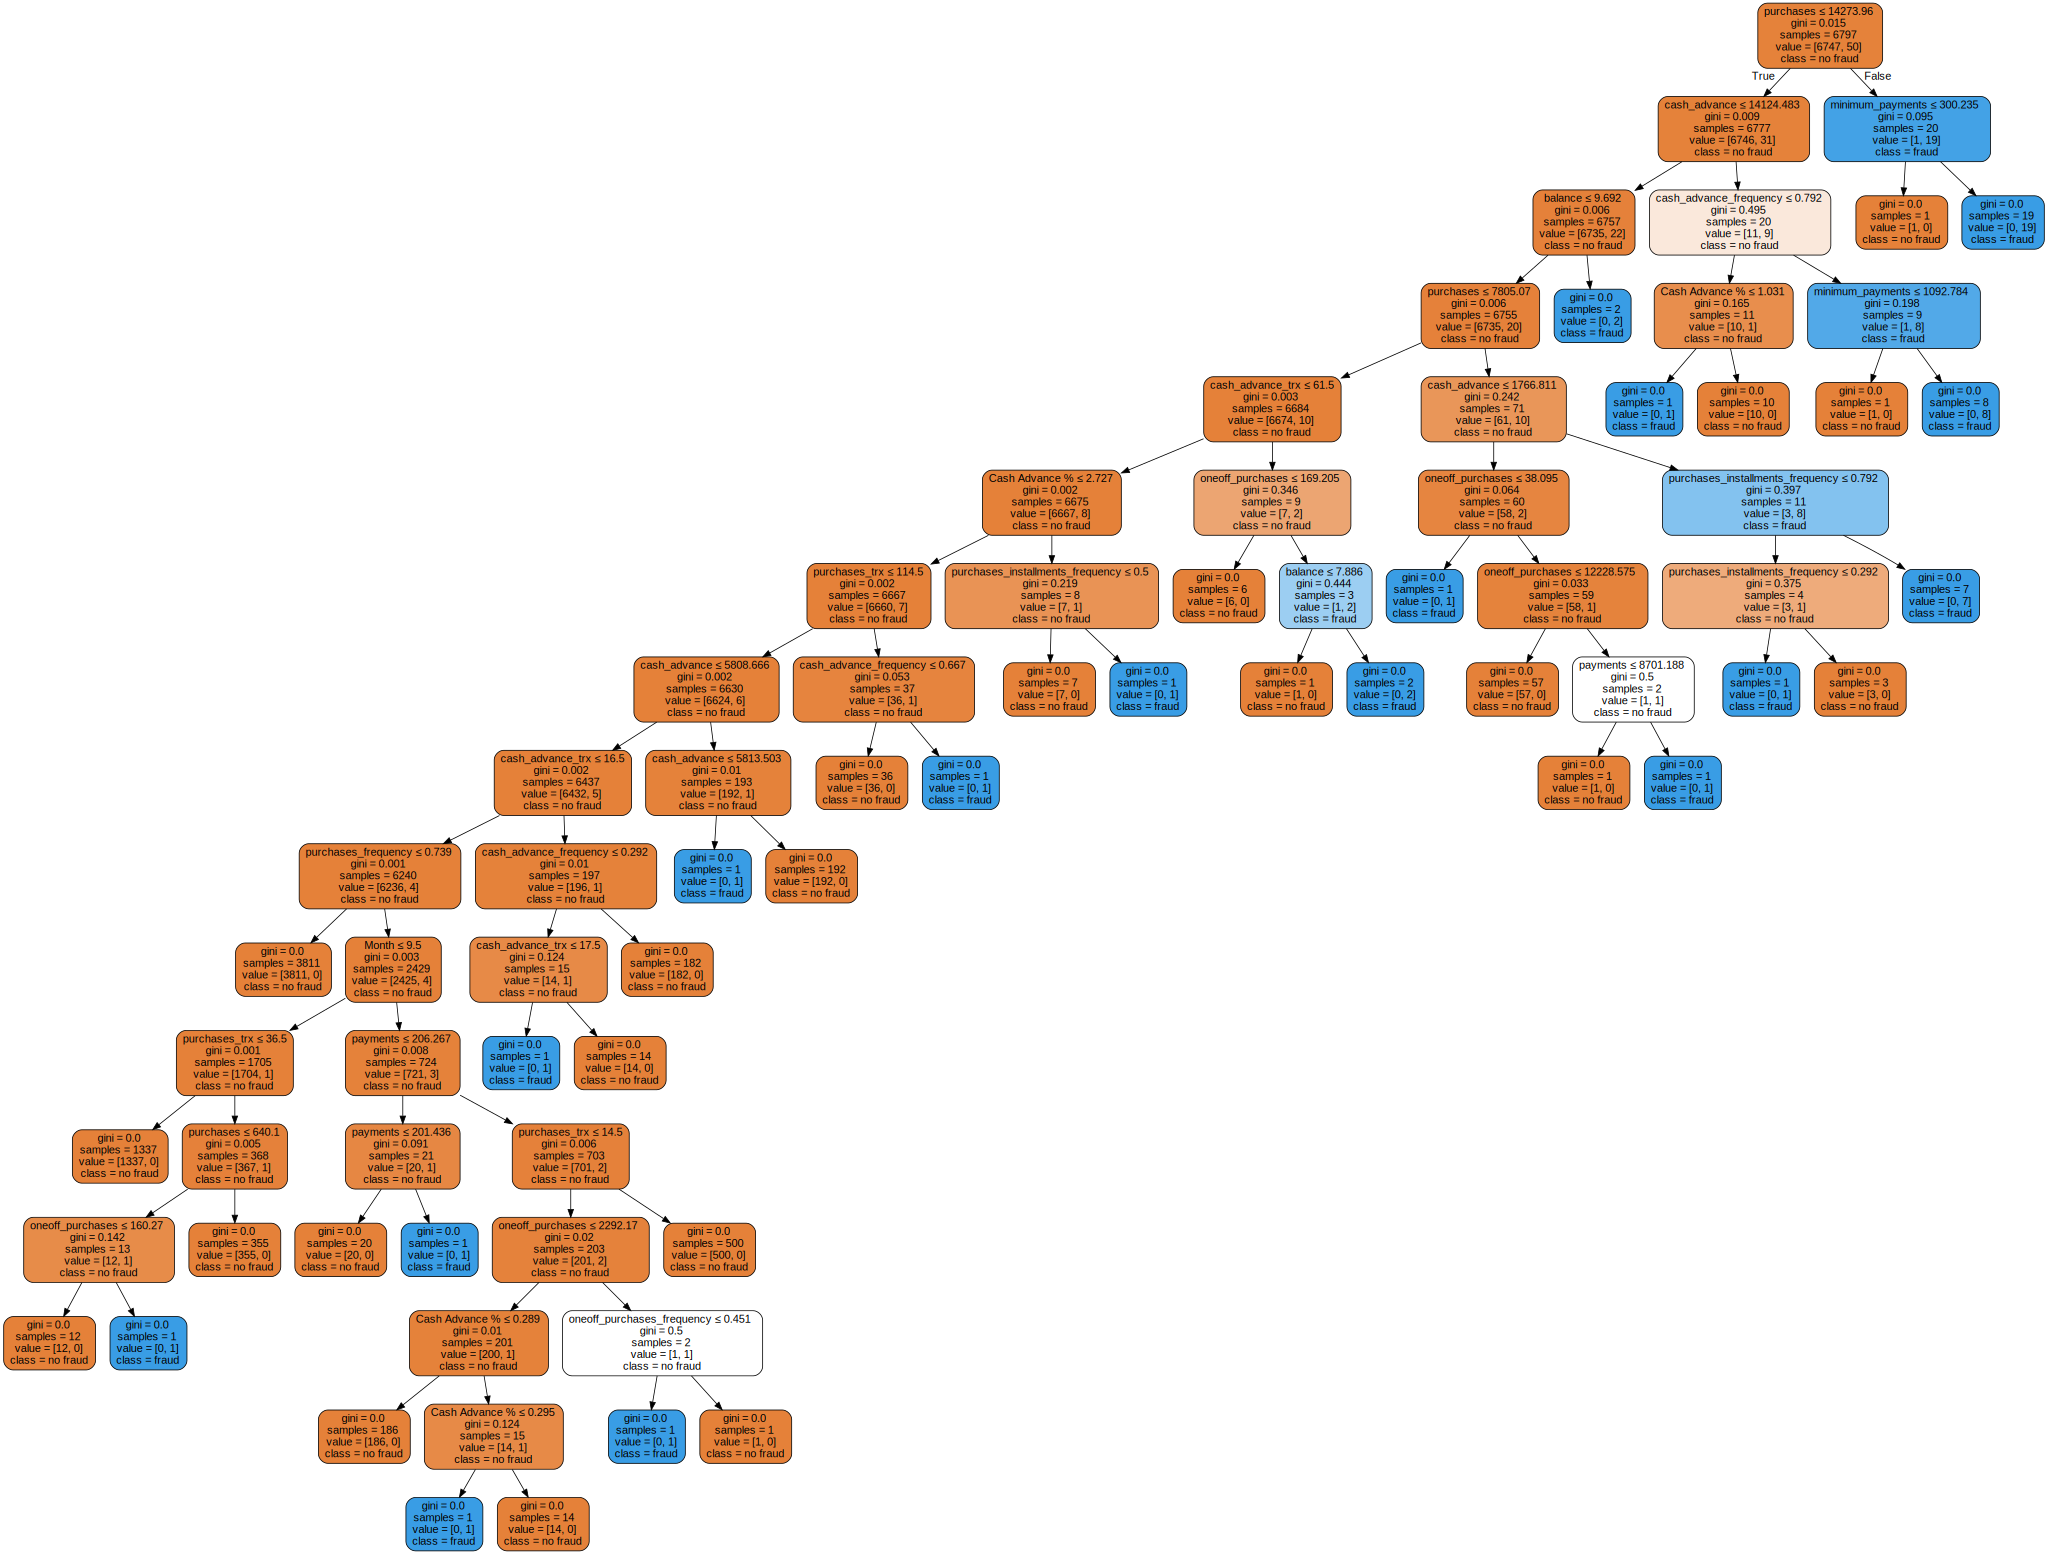

In [25]:
graph = graphviz.Source(dot_data)
graph

In [49]:
predi  = modelo.predict(test_data[x])



The model has an Accuracy of .9935, so it has a high level of prediction

In [50]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(test_data[y], predi))
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_data[y], predi))

Accuracy: 0.9964705882352941
[[1687    1]
 [   5    7]]


We occupy all the variables for this model, and we observe that many of them are not influential in the model.
We use the principle of Parsimony to take a simpler model, discarding all those variables that are not influential.

Text(0.5, 0, 'Decision Tree Importance')

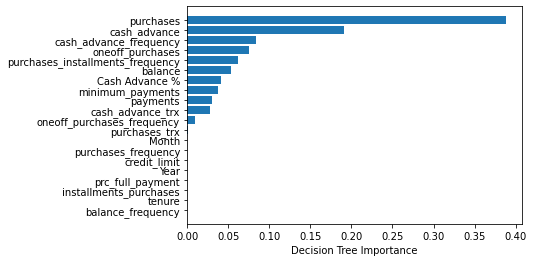

In [38]:
sorted_index = modelo.feature_importances_.argsort()
x = pd.array(x)
plt.barh(x[sorted_index], modelo.feature_importances_[sorted_index])
plt.xlabel("Decision Tree Importance")

In [61]:

#print(classification_report(test_data[y], predi))

[[1677    5]
 [   6   12]]


Therefore, we will discard all the variables that are not so important in the model to create a new and simple fully model.

In [51]:
x2 = ['balance','purchases','oneoff_purchases','cash_advance',
'oneoff_purchases_frequency','purchases_installments_frequency','cash_advance_frequency',
'cash_advance_trx','payments','minimum_payments','Cash Advance %']


In [52]:
modelo_ajustado = tree.DecisionTreeClassifier()

modelo_ajustado.fit(train_data[x2], train_data[y].values)

DecisionTreeClassifier()

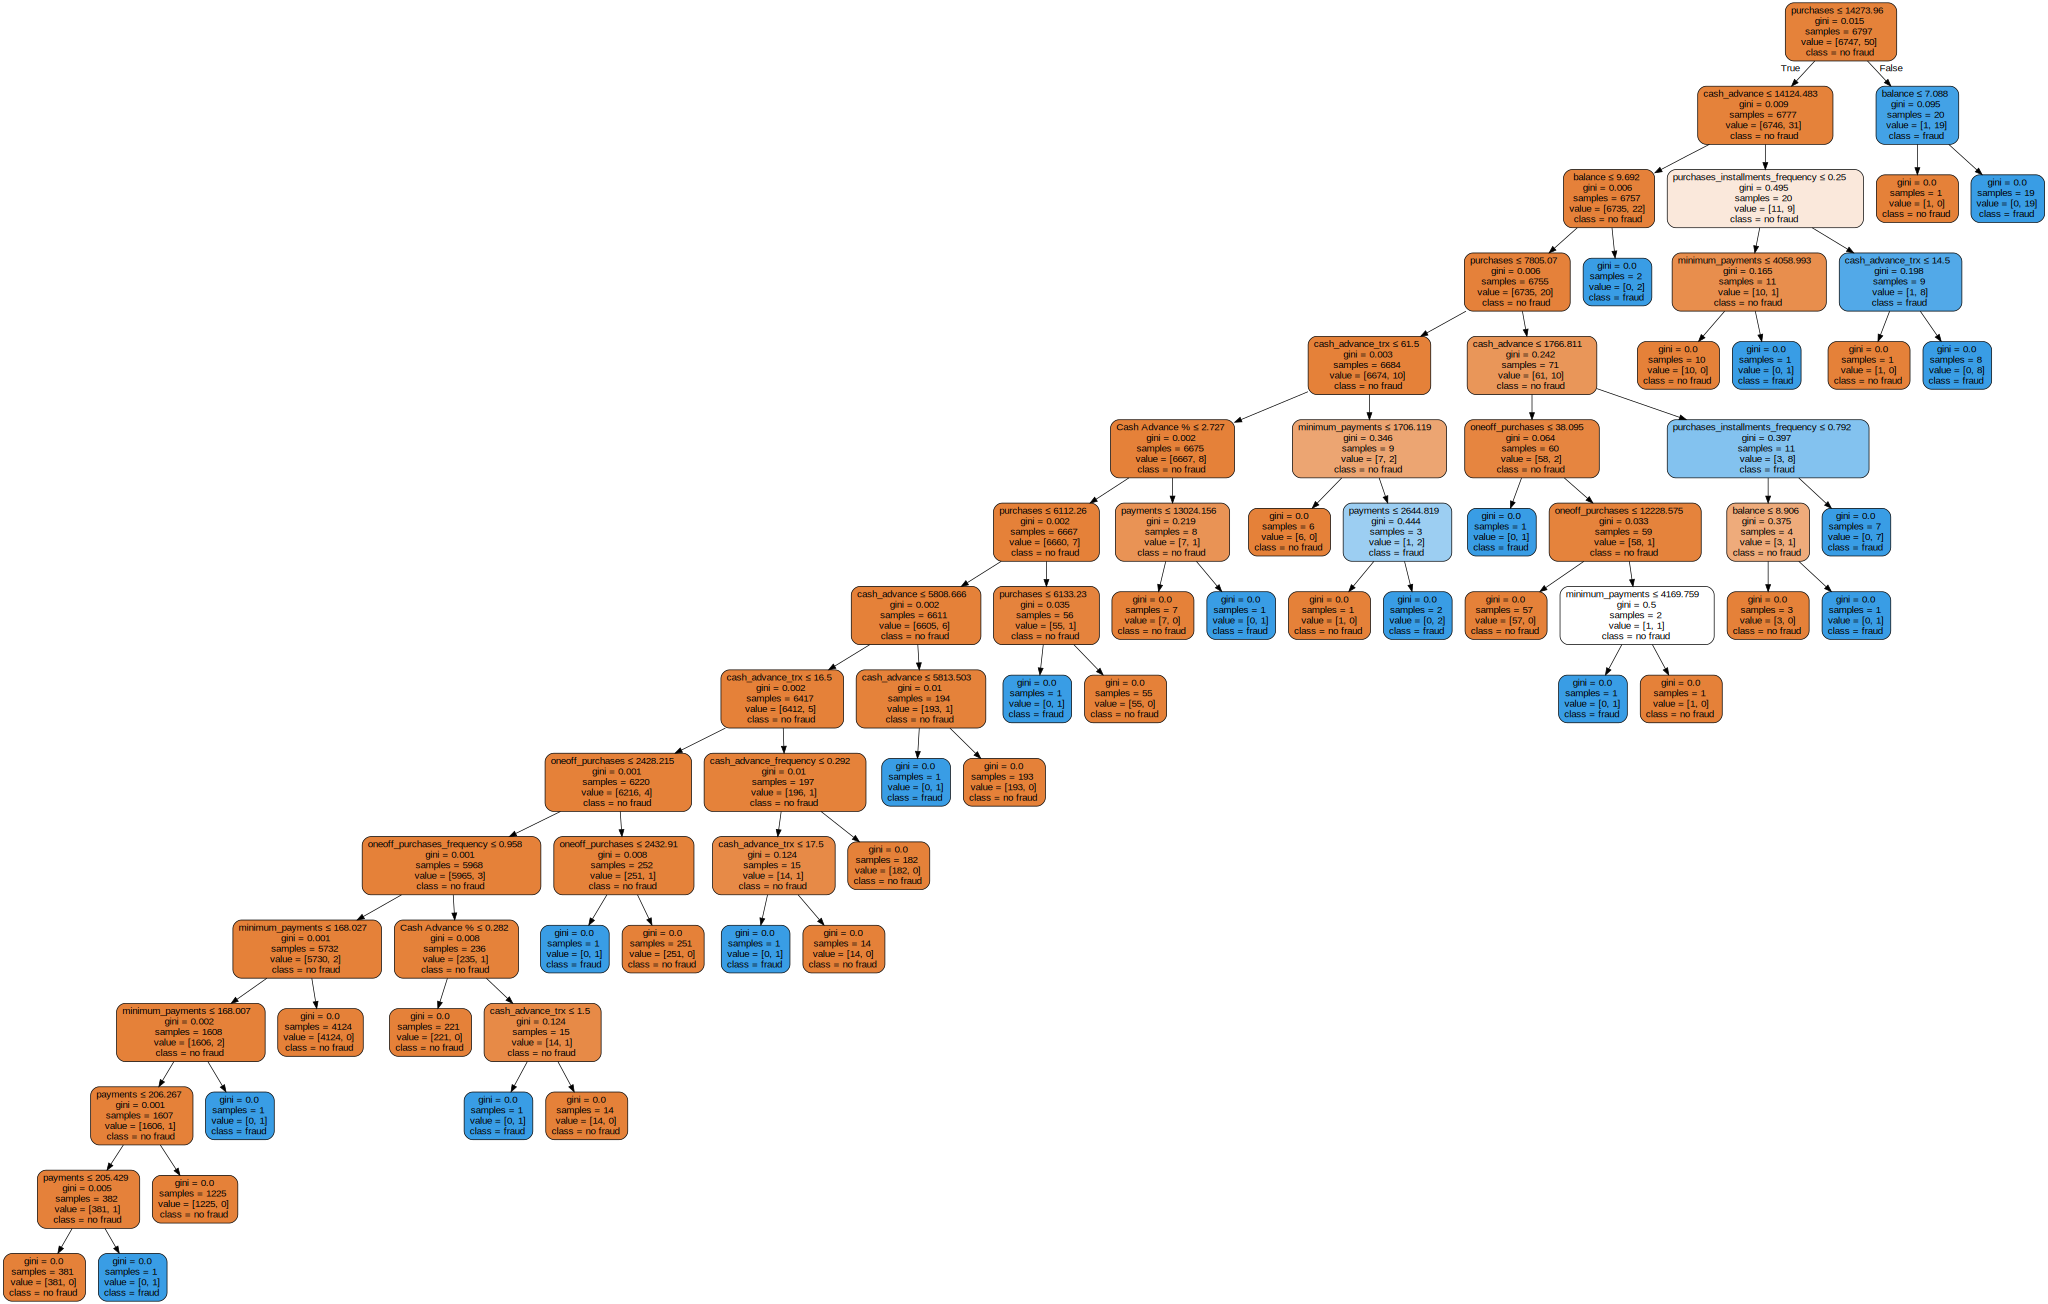

In [49]:
dot_data_ajustado = tree.export_graphviz(modelo_ajustado, out_file=None,
                               feature_names= x2,
                               filled=True, rounded=True,
                               special_characters=True,
                               class_names = ['no fraud', 'fraud'])

graph_ajustada = graphviz.Source(dot_data_ajustado)
graph_ajustada

In [53]:
predi_ajustado  = modelo_ajustado.predict(test_data[x2])

Text(0.5, 0, 'Decision Tree Importance (Modelo Ajustado)')

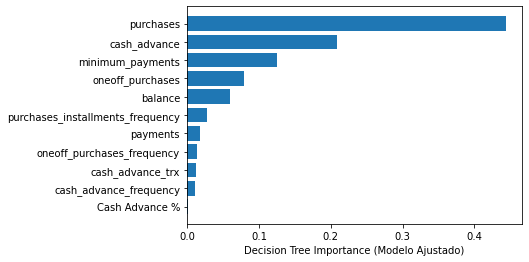

In [54]:
sorted_index = modelo_ajustado.feature_importances_.argsort()
x2 = pd.array(x2)
plt.barh(x2[sorted_index], modelo_ajustado.feature_importances_[sorted_index])
plt.xlabel("Decision Tree Importance (Modelo Ajustado)")

The variable Purchases is the most significant in the model since the more purchases you have, the more likely you will not pay. Followed by cash_advance because if you pay in advance, you are more likely not to commit Fraud. We also see that the model has better precision than the first model, so we decided to choose this one.

In [55]:
print("Accuracy:",metrics.accuracy_score(test_data[y], predi_ajustado))

Accuracy: 0.9947058823529412


In [60]:
print(confusion_matrix(test_data[y], predi_ajustado))
#print(classification_report(test_data[y], predi_ajustado))

[[1678    4]
 [   7   11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1682
           1       0.73      0.61      0.67        18

    accuracy                           0.99      1700
   macro avg       0.86      0.80      0.83      1700
weighted avg       0.99      0.99      0.99      1700

